In [1]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time

#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#fig_post_def()

In [2]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8,
                 unit = 1/2.54, SVG = False,onefig=True):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
    plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
    
    mpl.rcParams.update(new_rc_params)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    if onefig ==True:
        plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()
#
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist

In [3]:
def sorting(input_data, bin_number ,lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center,hist

In [4]:
def bar_plot(input_x,input_y,binning):
    xs = [input_x[0] - binning/2]
    ys = [0]
    for i in range(len(input_x)):
        xs.append(input_x[i] - binning/2)
        xs.append(input_x[i] + binning/2)
        ys.append(input_y[i])
        ys.append(input_y[i])
    xs.append(input_x[-1] + binning/2)
    ys.append(0)
    return np.array(xs),np.array(ys)

In [5]:
with open('single.csv') as f:
    lines=f.readlines()
    for line in lines:
        myarray = np.fromstring(line, dtype=float, sep=',')
        print(myarray)

FileNotFoundError: [Errno 2] No such file or directory: 'single.csv'

In [6]:
Wave_data = np.loadtxt("../../../data/gamma_neutron_waveform/WaveForm_ExtTri_20230624AmBe_Ch0_10cm_Ch4_10cmCFD80Pre100sm4_lsb15_1min_wave.txt")

In [7]:
#print(Wave_data[0,3:])

print(Wave_data[0:21,1])

gamma_wave   = Wave_data[2,3:]
neutron_wave = Wave_data[18,3:]

[0.291667 0.187154 0.177419 0.191011 0.316372 0.193059 0.193772 0.256114
 0.298999 0.338542 0.27451  0.195556 0.266265 0.329167 0.335821 0.187245
 0.277978 0.201754 0.317848 0.191283 0.190789]


In [8]:
Wave_time = 2*np.arange(0,len(Wave_data[0,3:]),1)

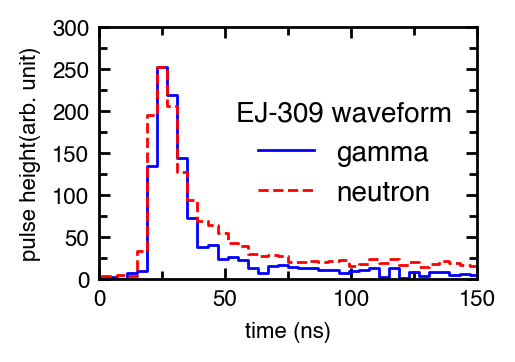

In [16]:
fig = fig_pre_def(6*0.8,4*0.8,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)  
ratio= (13255+(-1)*neutron_wave).max()/(13255+(-1)*gamma_wave).max()

gamma_bar_x,gamma_bar_y = bar_plot(Wave_time,ratio*(13255+(-1)*gamma_wave),2)
neutron_bar_x,neutron_bar_y  = bar_plot(Wave_time,13255+(-1)*neutron_wave,2)

plt.plot(-40+gamma_bar_x,6+gamma_bar_y,'b',linewidth = 1,label= 'gamma')
plt.plot(-40+neutron_bar_x,6+neutron_bar_y,'--r',linewidth = 1,label= 'neutron')

#plt.plot(Wave_time,ratio*(13255+(-1)*gamma_wave),'b',linewidth = 1,label= 'gamma')
#plt.plot(Wave_time,13255+(-1)*neutron_wave,'--r',linewidth = 1,label= 'neutron')

fig_post_def(xlim=(0,150),xticks = (50,25)
             ,ylim=(0,300),yticks = (50,25)
             ,xlabel="time (ns)"
             ,ylabel='pulse height(arb. unit)'
             ,title='EJ-309 waveform'
             ,lg_fs= 10)
plt.legend(fontsize=10,title='EJ-309 waveform',title_fontsize=10,frameon= False,loc='right')
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/waveform.svg',format= 'svg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


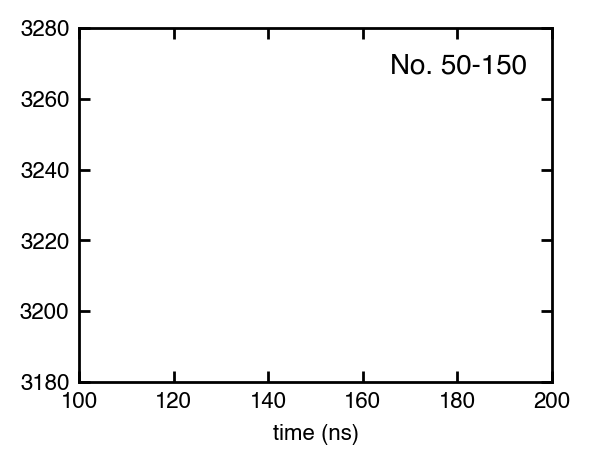

In [11]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)  

for i in np.arange(50,150,1):
    plt.plot(Wave_time,Wave_data[i,:],alpha=0.5)
plt.xlim(100,200)
fig_post_def(xlim=(100,200),ylim=(3180,3280),xlabel="time (ns)",title='No. 50-150',lg_fs= 10)

In [157]:
TAC_prodata = TAC_data%(0.01)
TAC_prodata_Tri = TAC_data_Tri%(0.01)

In [158]:
print(TAC_prodata[22000])
print(TAC_prodata_Tri[22000])

0.00814042724799603
0.003097208001987095


In [159]:
hist, edges = np.histogram(TAC_prodata,
    bins=1000, 
    range=(0, 0.01))
hist_Tri, edges_Tri = np.histogram(TAC_prodata_Tri,
    bins=1000, 
    range=(0, 0.01))

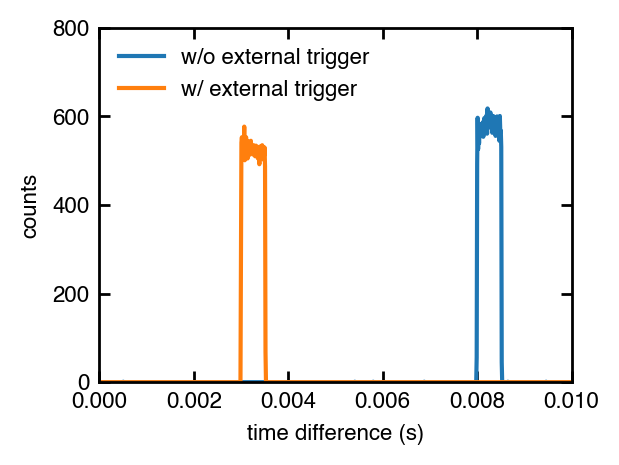

In [165]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(edges[:-1], hist,label='w/o external trigger')
plt.plot(edges_Tri[:-1], hist_Tri,label='w/ external trigger')

fig_post_def(xlim=(0,0.01),ylim=(0,800),lg_fs=8,ylabel="counts",xlabel="time difference (s)")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


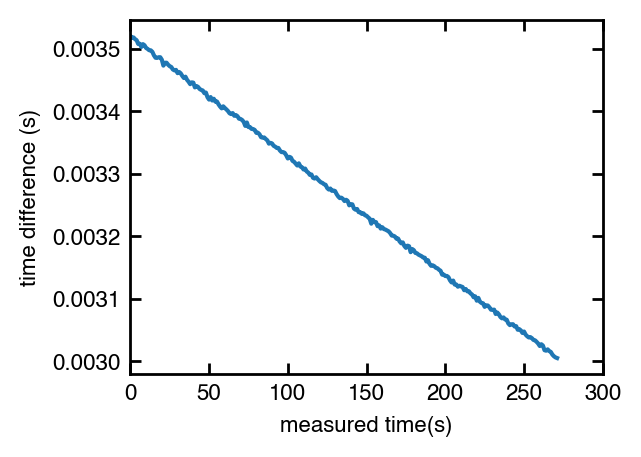

In [142]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

selected = np.arange(0,len(TAC_prodata_Tri),100)
plt.plot(0.01*selected,TAC_prodata_Tri[selected])
fig_post_def(xlim=(0,300),xlabel="measured time(s)",ylabel="time difference (s)")


In [145]:
#TAC_data = (10**-12) * np.loadtxt("../data/Time_10Hz_wo_ExtTri_20230324_ExtTri_DG535_C_IntTrig_100Hz_D_250ns_without_Ext_5min.txt")
TAC_data_Tri = (10**-12) * np.loadtxt("../data/Time_10Hz_w_ExtTri_20230324_ExtTri_5MHzFD512_9760Hz_with_DG535_C_ExtTrig_D_50ns_1min.txt")



In [146]:
print(TAC_data[:])
print(TAC_data_Tri[:])

[8.52210000e-03 1.85219656e-02 2.85217618e-02 ... 3.00138000e+02
 3.00148002e+02 3.00148002e+02]
[7.88924900e-06 1.10273373e-04 2.12644810e-04 ... 1.65983714e+01
 1.65984738e+01 1.65985762e+01]


In [147]:
print((5*10**6/512)**-1)

0.0001024


In [148]:
TAC_prodata = TAC_data%(0.01)
TAC_prodata_Tri = TAC_data_Tri%(0.0001024)

In [149]:
print(TAC_prodata[22000])
print(TAC_prodata_Tri[22000])

0.00814042724799603
3.1971374000077106e-05


In [150]:
hist, edges = np.histogram(TAC_prodata,
    bins=1000, 
    range=(0, 0.01))
hist_Tri, edges_Tri = np.histogram(TAC_prodata_Tri,
    bins=1000, 
    range=(0, 0.0001024))

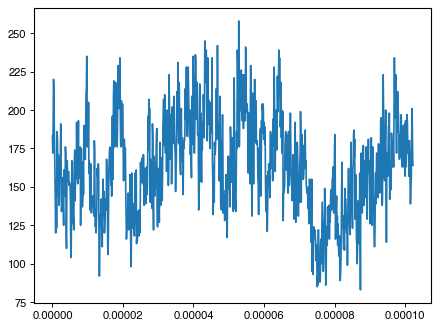

In [151]:
#plt.plot(edges[:-1], hist)
plt.plot(edges_Tri[:-1], hist_Tri)

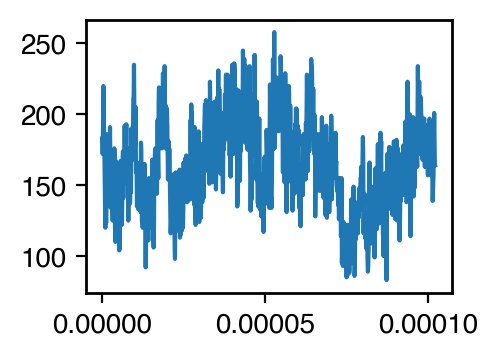

In [152]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(edges_Tri[:-1], hist_Tri)
#fig_post_def(xlim=(0,300),xlabel="measured time(s)",ylabel="time difference (s)")


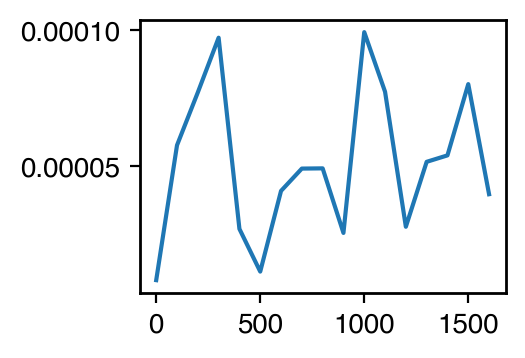

In [153]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

selected = np.arange(0,len(TAC_prodata_Tri),10000)
plt.plot(0.01*selected,TAC_prodata_Tri[selected])
#fig_post_def(xlim=(0,300),xlabel="measured time(s)",ylabel="time difference (s)")
